In [113]:
##### Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

## Data Preprocessing

In [115]:
#Loading the Dataset
cp_uae1 = pd.read_csv(r"C:\Users\USER\Desktop\Internpulse  Data Analytics Track\_cancer_dataset_uae.csv")
cp_uae1.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,None,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,None,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,None,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,None,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,None,East Asian,101,160


In [117]:
cp_uae1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

In [119]:
cp_uae1.columns

Index(['Patient_ID', 'Age', 'Gender', 'Nationality', 'Emirate',
       'Diagnosis_Date', 'Cancer_Type', 'Cancer_Stage', 'Treatment_Type',
       'Treatment_Start_Date', 'Hospital', 'Primary_Physician', 'Outcome',
       'Death_Date', 'Cause_of_Death', 'Smoking_Status', 'Comorbidities',
       'Ethnicity', 'Weight', 'Height'],
      dtype='object')

In [123]:
## Knowing The Number Of Columns And Rows
cp_uae1.shape

(10000, 20)

In [125]:
## Showing More Details Of Numeric Columns
cp_uae1.describe()

,Age,Weight,Height
count,10000.000000,10000.000000,10000.000000
mean,53.539700,69.550000,169.347500
std,20.757324,14.933339,10.070118
min,18.000000,18.000000,131.000000
25%,36.000000,60.000000,163.000000
50%,53.000000,70.000000,169.000000
75%,72.000000,80.000000,176.000000
max,89.000000,122.000000,208.000000


In [25]:
## looking Out For Null Values
cp_uae1.isnull().head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False


In [27]:
cp_uae1.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Nationality                0
Emirate                    0
Diagnosis_Date             0
Cancer_Type                0
Cancer_Stage               0
Treatment_Type             0
Treatment_Start_Date       0
Hospital                   0
Primary_Physician          0
Outcome                    0
Death_Date              9008
Cause_of_Death          9008
Smoking_Status             0
Comorbidities              0
Ethnicity                  0
Weight                     0
Height                     0
dtype: int64

In [29]:
# Checking  the relationship between Outcome and missing Death_Date so as to know whether thier important in the analysis
print(cp_uae1[cp_uae1['Outcome'] == 'Deceased']['Death_Date'].isnull().sum())  # if 0, then it means data is consistent
print(cp_uae1[cp_uae1['Outcome'] != 'Deceased']['Death_Date'].notnull().sum())  

0
0


In [31]:
### Checking Out For Duplicates
cp_uae1.duplicated().sum()

0

There were no duplicates in the dataset

In [33]:
## Checking Out For Data Type
cp_uae1['Diagnosis_Date'].dtype

dtype('O')

In [35]:
### Converting Date From String to Date datatype
import datetime as dt

cp_uae1['Diagnosis_Date'] = pd.to_datetime(cp_uae1['Diagnosis_Date'])
cp_uae1['Treatment_Start_Date'] = pd.to_datetime(cp_uae1['Treatment_Start_Date'])

In [42]:
cp_uae1[['Diagnosis_Date','Treatment_Start_Date']]

,Diagnosis_Date,Treatment_Start_Date
0,2020-11-30,2020-12-04
1,2015-10-10,2015-11-05
2,2018-02-13,2018-08-03
3,2022-02-04,2022-03-13
4,2019-12-03,2020-02-29
...,...,...
9995,2016-01-21,2016-04-03
9996,2018-12-06,2019-03-23
9997,2016-06-11,2016-10-21
9998,2018-11-12,2019-02-05


In [72]:
## Rechecking the Datatypes
cp_uae1[['Diagnosis_Date','Treatment_Start_Date']].dtypes

Diagnosis_Date          datetime64[ns]
Treatment_Start_Date    datetime64[ns]
dtype: object

Creating Categories

In [44]:
## Checking the number of unique ages in the age category
print('Count Of Unique Ages :', cp_uae1['Age'].nunique())

print('\n')
print('Count Of Unique Ages :', cp_uae1['Age'].unique())

Count Of Unique Ages : 72


Count Of Unique Ages : [69 32 89 78 38 41 20 39 70 19 47 55 81 77 50 75 66 76 59 79 64 68 72 24
 56 35 21 31 26 88 61 25 52 53 67 23 71 80 51 65 57 43 58 46 62 82 18 28
 22 45 29 40 54 44 60 30 49 83 74 87 73 36 85 34 86 33 37 84 48 42 63 27]


In [127]:
## Creating New Columns to classify age into groups
print(cp_uae1['Age'].describe())

# create bins for the various age categories
twenty_fifth = cp_uae1['Age'].quantile(0.25)
median = cp_uae1['Age'].median()
seventy_fifth = cp_uae1['Age'].quantile(0.75)
maximum = cp_uae1['Age'].max()

# Creating labels and bins for the various age categories
labels = ['young adult', 'middle_age', 'older_adult', 'elderlies']
bins = [0, twenty_fifth, median, seventy_fifth, maximum]

# Creating A category colum for age
cp_uae1['Age_Category'] = pd.cut(cp_uae1['Age'], labels=labels, bins=bins)

count    10000.000000
mean        53.539700
std         20.757324
min         18.000000
25%         36.000000
50%         53.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64


###### So with this we can se the minimum opr youngest age as 18, elderly as 89, mid age as 53

In [129]:
cp_uae1[['Age', 'Age_Category']]

,Age,Age_Category
0,69,older_adult
1,32,young adult
2,89,elderlies
3,78,elderlies
4,38,middle_age
...,...,...
9995,88,elderlies
9996,43,middle_age
9997,63,older_adult
9998,63,older_adult


# Checking and Fixing Inconsistencies

In [131]:
for x in cp_uae1.columns:
    print(cp_uae1[x].unique())

['PAT000001' 'PAT000002' 'PAT000003' ... 'PAT009998' 'PAT009999'
 'PAT010000']
[69 32 89 78 38 41 20 39 70 19 47 55 81 77 50 75 66 76 59 79 64 68 72 24
 56 35 21 31 26 88 61 25 52 53 67 23 71 80 51 65 57 43 58 46 62 82 18 28
 22 45 29 40 54 44 60 30 49 83 74 87 73 36 85 34 86 33 37 84 48 42 63 27]
['Female' 'Male' 'Other']
['Emirati' 'Expatriate']
['Umm Al Quwain' 'Abu Dhabi' 'Fujairah' 'Ras Al Khaimah' 'Sharjah' 'Dubai'
 'Ajman']
['2020-11-30' '2015-10-10' '2018-02-13' ... '2019-06-21' '2022-09-18'
 '2016-06-11']
['Liver' 'Leukemia' 'Lung' 'Pancreatic' 'Breast' 'Ovarian' 'Prostate'
 'Colorectal']
['II' 'III' 'I' 'IV']
['Radiation' 'Surgery' 'Chemotherapy' 'Immunotherapy']
['2020-12-04' '2015-11-05' '2018-08-03' ... '2024-06-02' '2016-09-16'
 '2017-12-23']
['Sheikh Khalifa Hospital' 'Dubai Hospital' 'Zayed Military Hospital'
 'Cleveland Clinic Abu Dhabi']
['Dr. VO41' 'Dr. SM31' 'Dr. BC7' ... 'Dr. WT6' 'Dr. JB17' 'Dr. SI45']
['Recovered' 'Under Treatment' 'Deceased']
[nan '2024-12-22 00

##### There were no inconsistencies

# Univirate Analysis 

In [133]:
#Statistical View Of Categorical columns
cp_uae1.select_dtypes(include='object').describe()

,Patient_ID,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,992,992,10000,10000,10000
unique,10000,3,2,7,3151,8,4,4,3250,4,8614,3,867,2,3,4,5
top,PAT000001,Female,Emirati,Ajman,2023-12-13,Leukemia,III,Radiation,2022-05-17,Sheikh Khalifa Hospital,Dr. AJ25,Recovered,2022-06-28 00:00:00,Complications,Non-Smoker,None,South Asian
freq,1,4985,5920,1497,12,1314,3041,2519,12,2541,5,4931,3,507,5038,4047,2083


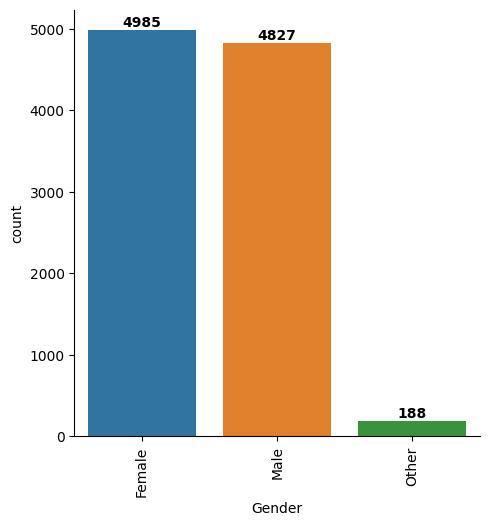

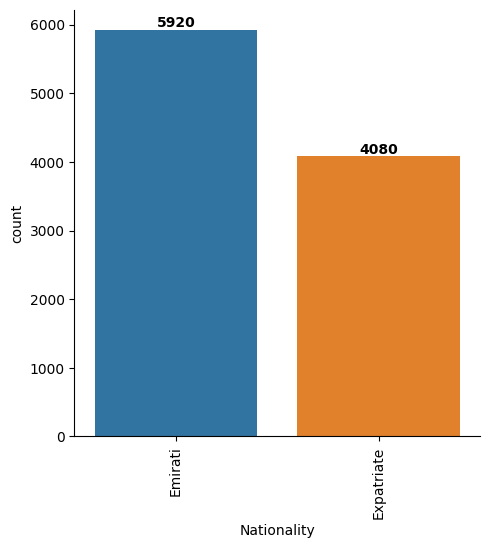

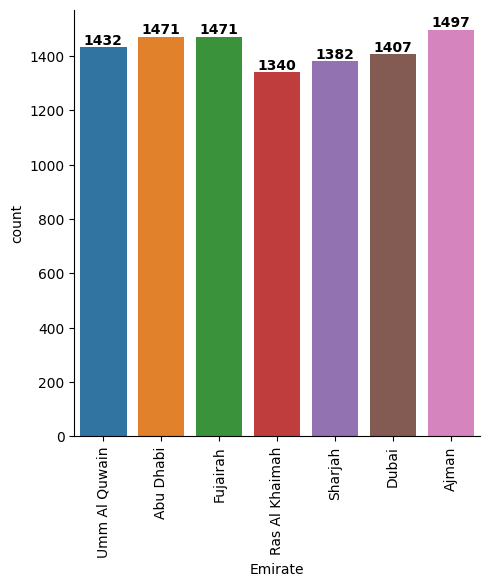

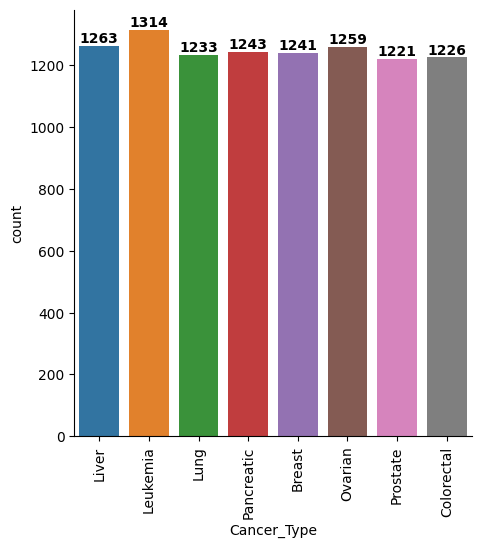

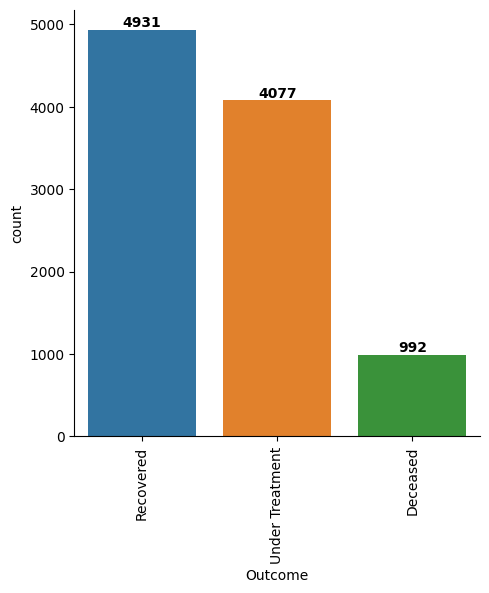

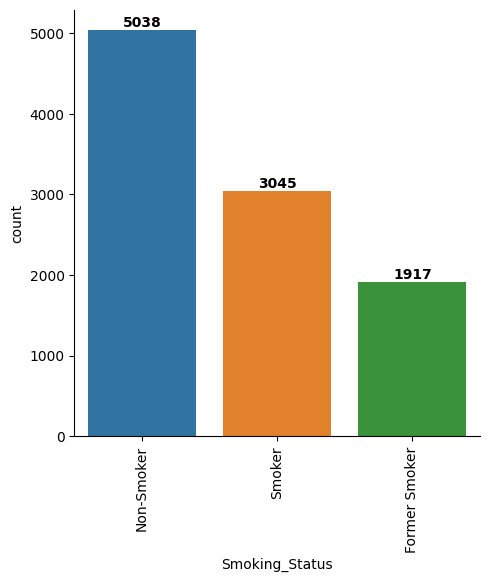

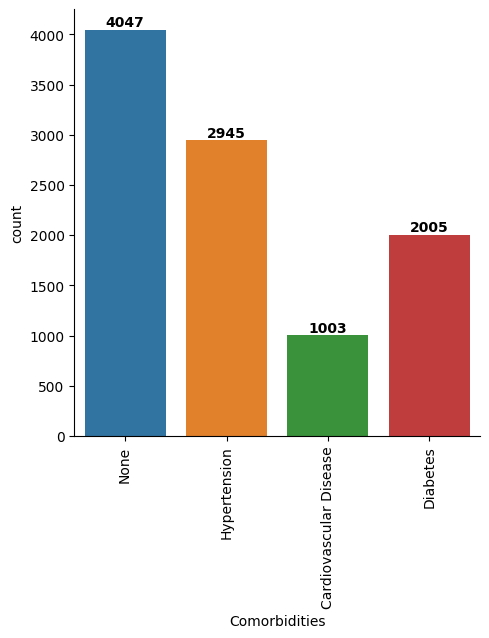

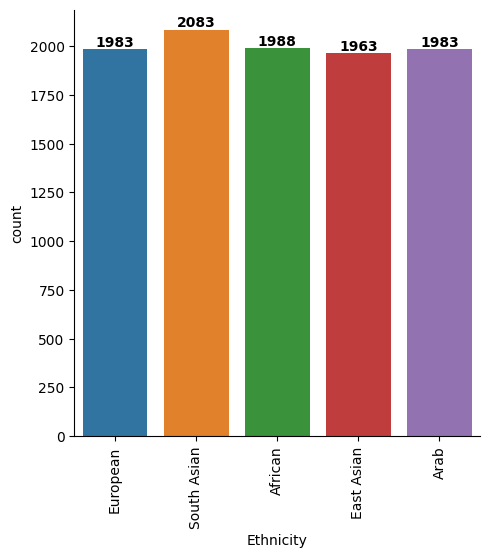

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_bar_graph():
    column_list = ['Gender', 'Nationality', 'Emirate', 'Cancer_Type', 'Outcome', 
               'Smoking_Status', 'Comorbidities', 'Ethnicity']
    for c in column_list:
        g = sns.catplot(x=c, data=cp_uae1, kind='count')
        ax = g.ax  # Get the Axes object
        
        # Adding data labels to bars
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2, p.get_height()), 
                        ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        plt.show()

plot_bar_graph()

In [135]:
# Statistical View Of The numerical Column
cp_uae1.describe()

,Age,Weight,Height
count,10000.000000,10000.000000,10000.000000
mean,53.539700,69.550000,169.347500
std,20.757324,14.933339,10.070118
min,18.000000,18.000000,131.000000
25%,36.000000,60.000000,163.000000
50%,53.000000,70.000000,169.000000
75%,72.000000,80.000000,176.000000
max,89.000000,122.000000,208.000000


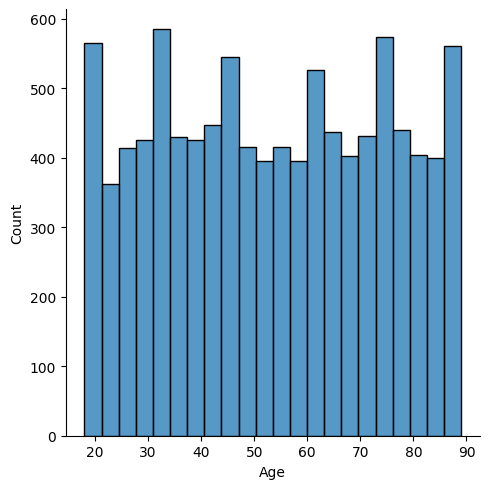

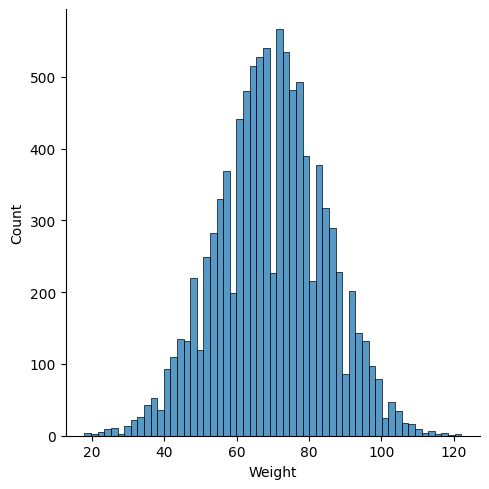

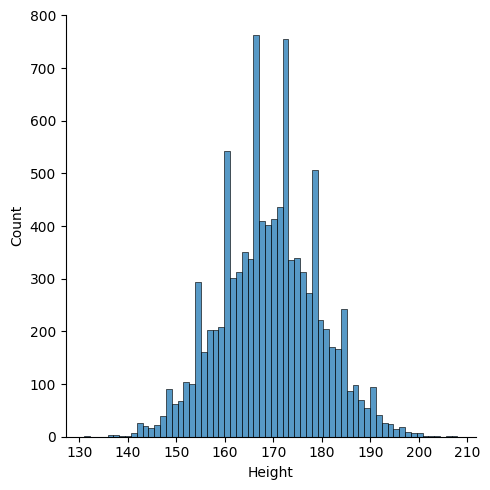

In [190]:
def plot_bar_graph():
    col_list = ['Age','Weight','Height']
    for c in col_list:
        g = sns.displot(cp_uae1[c])
   
        plt.show()

plot_bar_graph()

#### Identifying Skewness, kurtosis And Outliers

In [137]:
print(cp_uae1.Age.skew())
print(cp_uae1.Age.kurt())

0.003845595965890207
-1.2069307820285955


In [139]:
print(cp_uae1.Height.skew())
print(cp_uae1.Height.kurt())

0.037133184381490006
-0.01734528080137432


In [141]:
print(cp_uae1.Weight.skew())
print(cp_uae1.Weight.kurt())

-0.04070503390365058
-0.028555338749302273


In [143]:
var_cor = cp_uae1.corr()
var_cor

,Age,Weight,Height
Age,1.000000,0.009409,-0.005786
Weight,0.009409,1.000000,0.013776
Height,-0.005786,0.013776,1.000000


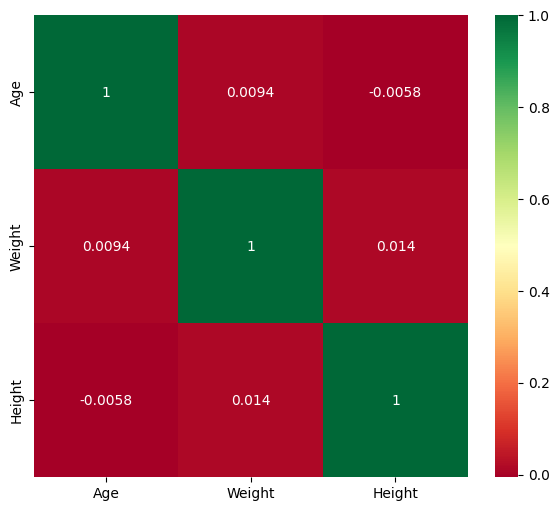

In [60]:
plt.figure(figsize=(7,6))
sns.heatmap(data=var_cor, annot=True, cmap='RdYlGn')
plt.show()

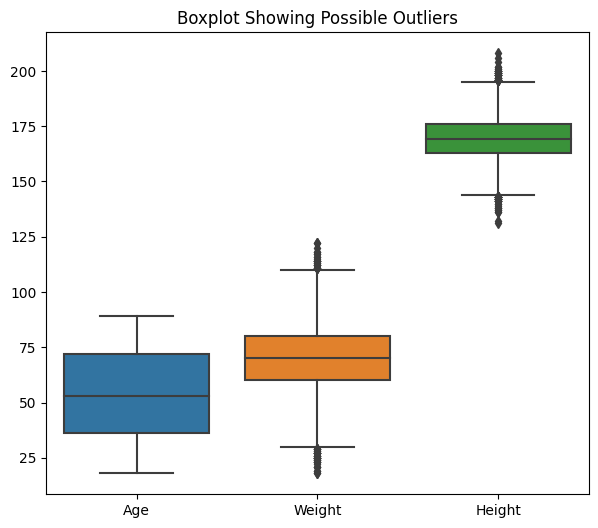

In [145]:
plt.figure(figsize=(7,6))
sns.boxplot(data=cp_uae1[['Age','Weight','Height']])
plt.title('Boxplot Showing Possible Outliers')
plt.show()

##### There are no outliers in Age but Weight and Height both show outliers

# Bivirate Analysis
#### We Will Analyze the relantionships between numeric Values

<function matplotlib.pyplot.show(close=None, block=None)>

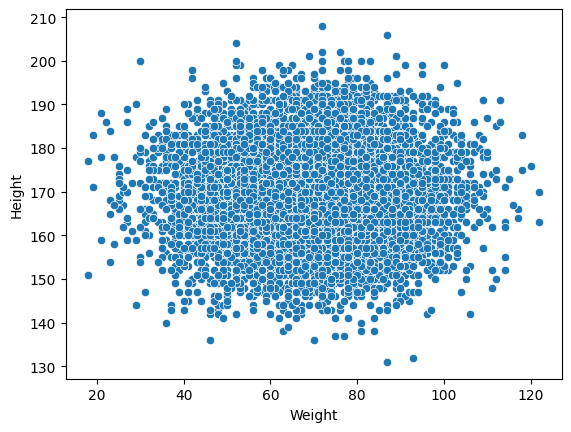

In [106]:
# Relantionship Between Weight and Height
sns.scatterplot(x="Weight", y = "Height", data=cp_uae1)
plt.show

##### This shows theres no correlation between the weight and the height

<function matplotlib.pyplot.show(close=None, block=None)>

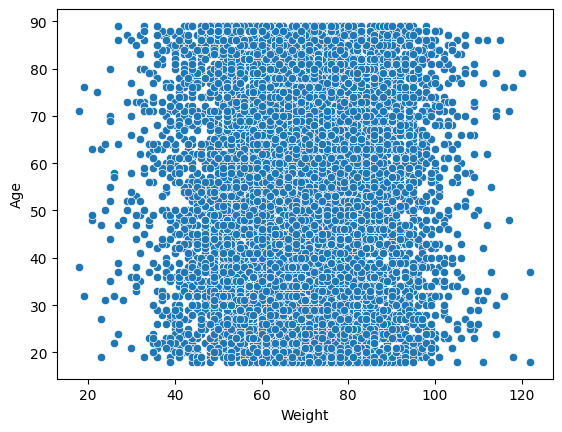

In [63]:
# Relantionship Between Weight and Height
sns.scatterplot(x="Weight", y = "Age", data=cp_uae1)
plt.show

##### There's also no correlation between weights of the patients and age. Thus they has no relationship

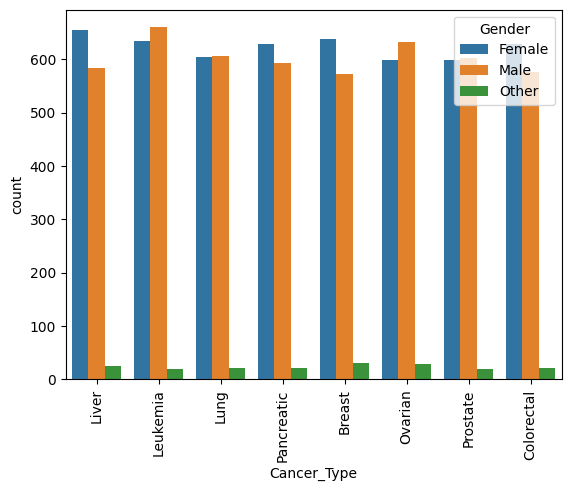

In [110]:
# Distribution Of Cancer Type For Gender
sns.countplot(hue='Gender', x='Cancer_Type', data=cp_uae1)

plt.xticks(rotation=90)
plt.show()

##### Looks like the main distribution of patients and cases is between males and females

In [68]:
cp_uae1['Cancer_Stage'].value_counts()

III    3041
II     3036
I      2419
IV     1504
Name: Cancer_Stage, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

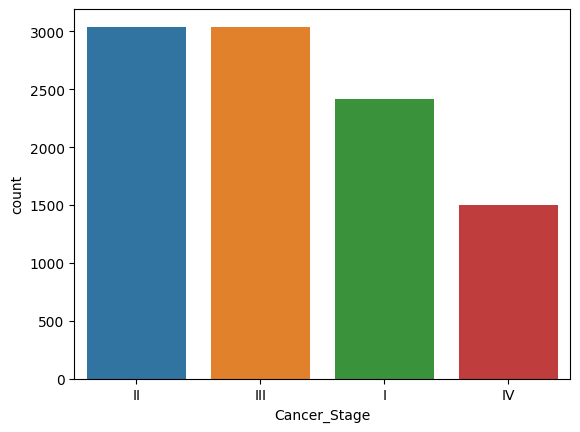

In [70]:
# distribution Of Cancer Stage
sns.countplot(x='Cancer_Stage', data=cp_uae1)
plt.show

##### More patients were found in stages 2 annd 3 with slight difference betwen them, followed by stage 1 and a few in stage 4

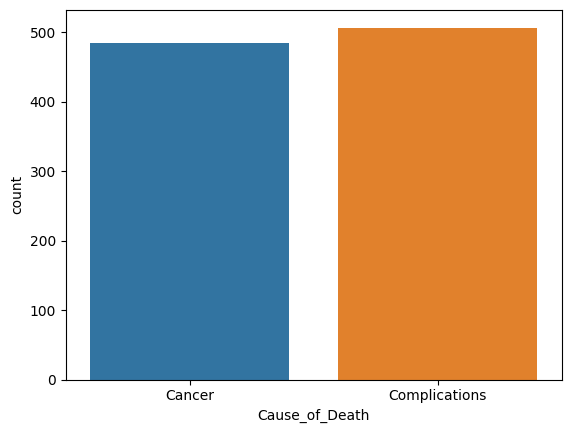

In [72]:
# comobidities associated with causes of death
sns.countplot(x="Cause_of_Death", data=cp_uae1)
plt.show()

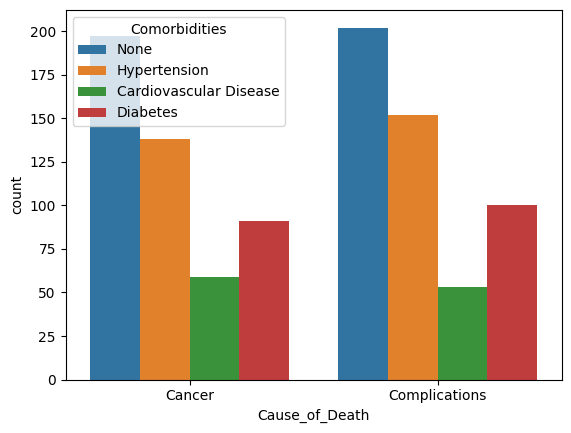

In [140]:
sns.countplot(x="Cause_of_Death", hue="Comorbidities", data=cp_uae1)
plt.show()

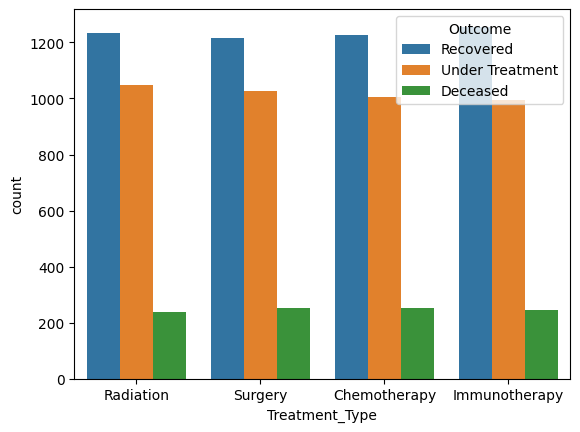

In [138]:
#Outcome for varioustreatment types
sns.countplot(x="Treatment_Type", hue="Outcome", data=cp_uae1)
plt.show()

In [194]:
cp_uae1['Time_Delta'] = cp_uae1['Treatment_Start_Date'] - cp_uae1['Diagnosis_Date']

cp_uae1['Time_Delta']

0        4 days
1       26 days
2      171 days
3       37 days
4       88 days
         ...   
9995    73 days
9996   107 days
9997   132 days
9998    85 days
9999    98 days
Name: Time_Delta, Length: 10000, dtype: timedelta64[ns]

In [198]:
cp_uae1['Time_Delta'].describe()

count                         10000
mean        89 days 08:19:40.800000
std      52 days 07:11:18.298964457
min                 0 days 00:00:00
25%                44 days 00:00:00
50%                90 days 00:00:00
75%               135 days 00:00:00
max               179 days 00:00:00
Name: Time_Delta, dtype: object

In [221]:
cp_uae1.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,...,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height,Age_Category,Time_Delta,Year
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,...,NaN,NaN,Non-Smoker,None,European,61,157,older_adult,4 days,2020
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,...,NaN,NaN,Smoker,None,South Asian,80,175,young adult,26 days,2015
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,...,NaN,NaN,Non-Smoker,None,South Asian,50,175,elderlies,171 days,2018
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,...,NaN,NaN,Former Smoker,None,African,44,155,elderlies,37 days,2022
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,...,NaN,NaN,Former Smoker,None,East Asian,101,160,middle_age,88 days,2019


In [200]:
cp_uae1[['Diagnosis_Date', 'Treatment_Start_Date']].sample(10)

,Diagnosis_Date,Treatment_Start_Date
8171,2019-08-28,2019-10-25
3242,2016-08-28,2016-09-28
7936,2018-10-25,2018-12-18
7397,2018-04-05,2018-08-15
449,2015-11-16,2015-11-28
8507,2015-07-09,2015-12-24
4453,2018-03-27,2018-04-03
9832,2017-05-08,2017-10-17
4078,2020-11-09,2020-12-27
4267,2016-10-03,2016-11-23


In [147]:
# Data Preprocessing ----------------------------------------------------------
# Convert Diagnosis_Date to datetime and extract year
cp_uae1['Diagnosis_Date'] = pd.to_datetime(cp_uae1['Diagnosis_Date'])
cp_uae1['Year'] = cp_uae1['Diagnosis_Date'].dt.year

# Create Recovery_Status from Outcome
cp_uae1['Recovery_Status'] = cp_uae1['Outcome'].apply(lambda x: 1 if x == 'Recovered' else 0)

# Handle comorbidities
cp_uae1['Comorbidities'] = cp_uae1['Comorbidities'].fillna('None')
comorbidities_dummies = cp_uae1['Comorbidities'].str.get_dummies(sep=', ')
cp_uae1 = pd.concat([cp_uae1, comorbidities_dummies.add_prefix('Comorbidity_')], axis=1)

# Calculate BMI
cp_uae1['Height_m'] = cp_uae1['Height'] / 100
cp_uae1['BMI'] = cp_uae1['Weight'] / (cp_uae1['Height_m'] ** 2)

## Exploratoray Data Analysis
#### 1. Recovery Rates Over the Years

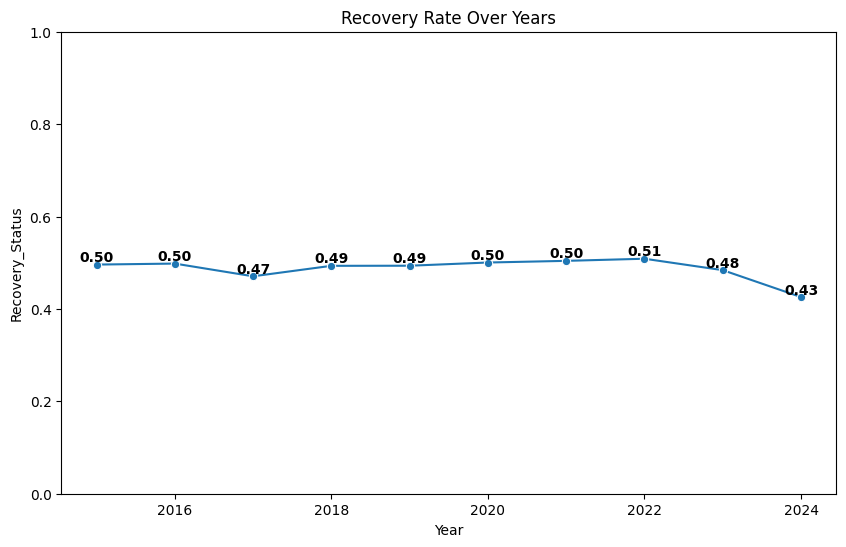

In [251]:
# 1. Recovery Rate Over Years
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
recovery_by_year = cp_uae1.groupby('Year')['Recovery_Status'].mean().reset_index()
ax = sns.lineplot(x='Year', y='Recovery_Status', data=recovery_by_year, marker='o')
for x, y in zip(recovery_by_year['Year'], recovery_by_year['Recovery_Status']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
plt.title('Recovery Rate Over Years')
plt.ylim(0, 1)
plt.show()

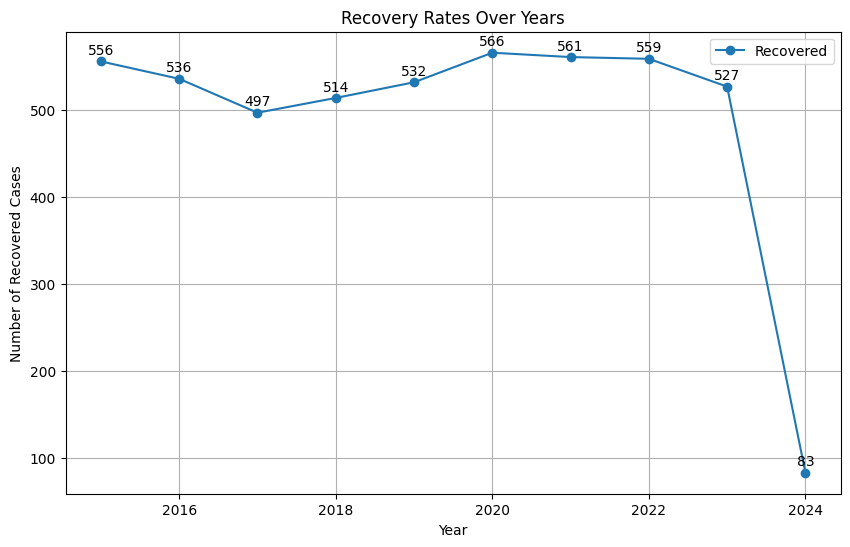

In [255]:
# Group by year and count the occurrences of each outcome
outcome_counts_by_year = cp_uae1.groupby(['Year', 'Outcome']).size().unstack(fill_value=0)

# Calculate the total count per year
outcome_counts_by_year['Total'] = outcome_counts_by_year.sum(axis=1)

# Calculate the proportion of recovered cases
outcome_counts_by_year['Recovered_Proportion'] = outcome_counts_by_year['Recovered'] / outcome_counts_by_year['Total']

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(outcome_counts_by_year.index, outcome_counts_by_year['Recovered'], marker='o', label='Recovered')


# Annotate each point on the line plot with the count
for x, y in zip(outcome_counts_by_year.index, outcome_counts_by_year['Recovered']):
  plt.annotate(str(y), xy=(x, y), textcoords='offset points', xytext=(0, 5), ha='center')

plt.xlabel('Year')
plt.ylabel('Number of Recovered Cases')
plt.title('Recovery Rates Over Years')
plt.legend()
plt.grid(True)
plt.show()

#### 2. Recovery Rate Per Cancer Type

In [261]:
cp_uae1['Cancer_Type'].value_counts()

Leukemia      1314
Liver         1263
Ovarian       1259
Pancreatic    1243
Breast        1241
Lung          1233
Colorectal    1226
Prostate      1221
Name: Cancer_Type, dtype: int64

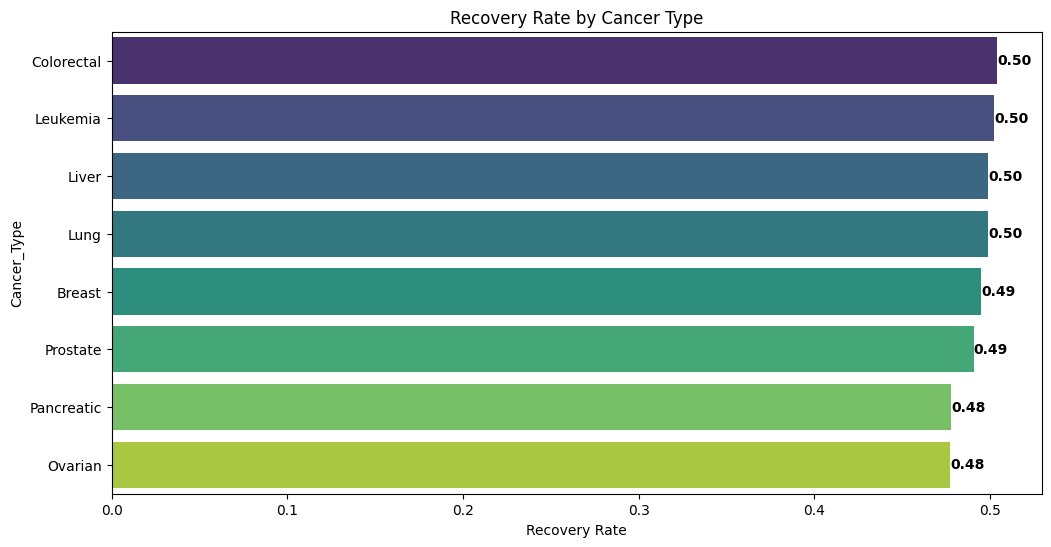

In [267]:
# 2. Recovery Rate by Cancer Type
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
recovery_by_cancer = cp_uae1.groupby('Cancer_Type')['Recovery_Status'].mean().sort_values(ascending=False)

ax = sns.barplot(x=recovery_by_cancer.values, y=recovery_by_cancer.index, palette='viridis')
for i, value in enumerate(recovery_by_cancer.values):
    ax.text(value, i, f'{value:.2f}', ha='left', va='center', fontsize=10, color='black', fontweight='bold')
plt.title('Recovery Rate by Cancer Type')
plt.xlabel('Recovery Rate')
plt.show()

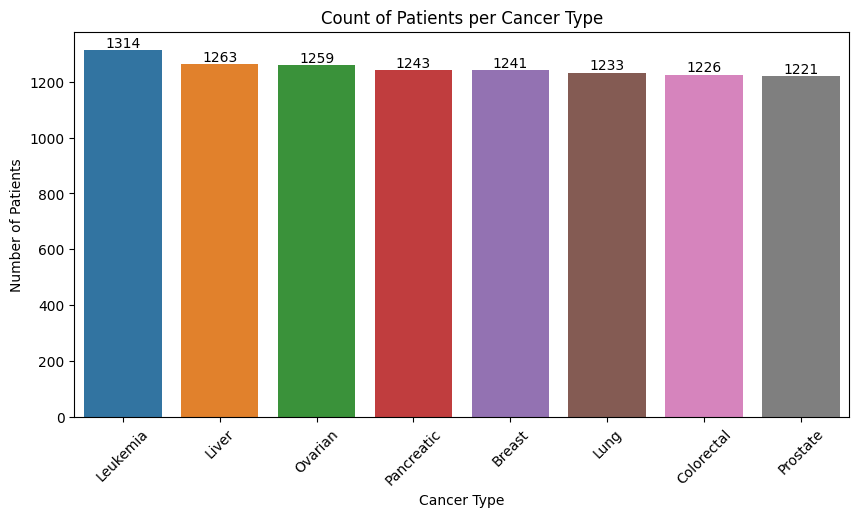

In [265]:
cancer_type_counts = cp_uae['Cancer_Type'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=cancer_type_counts.index, y=cancer_type_counts.values)
plt.title('Count of Patients per Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')


plt.show()

#### 3. Smoking Status Impacts

In [274]:
cp_uae1['Smoking_Status'].value_counts()

Non-Smoker       5038
Smoker           3045
Former Smoker    1917
Name: Smoking_Status, dtype: int64

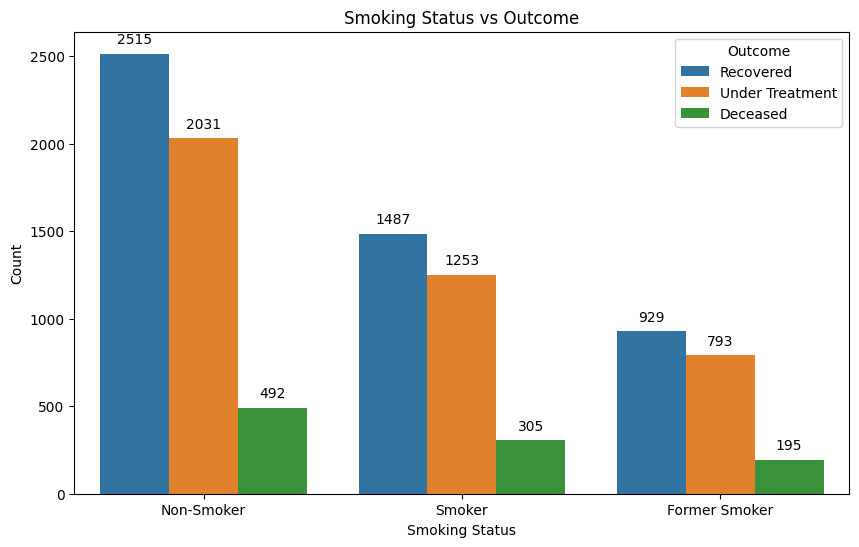

In [280]:
plt.figure(figsize=(10, 6))  # Increased figure size for better readability
smoking_status_counts = cp_uae1['Smoking_Status'].value_counts()
ax = sns.countplot(x='Smoking_Status', data=cp_uae1, hue='Outcome')
plt.title('Smoking Status vs Outcome')
plt.xlabel('Smoking Status')
plt.ylabel('Count')


# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

#### 4. Top 5 Cancer Types

In [291]:
cp_uae1['Cancer_Type'].value_counts().nlargest(5)

Leukemia      1314
Liver         1263
Ovarian       1259
Pancreatic    1243
Breast        1241
Name: Cancer_Type, dtype: int64

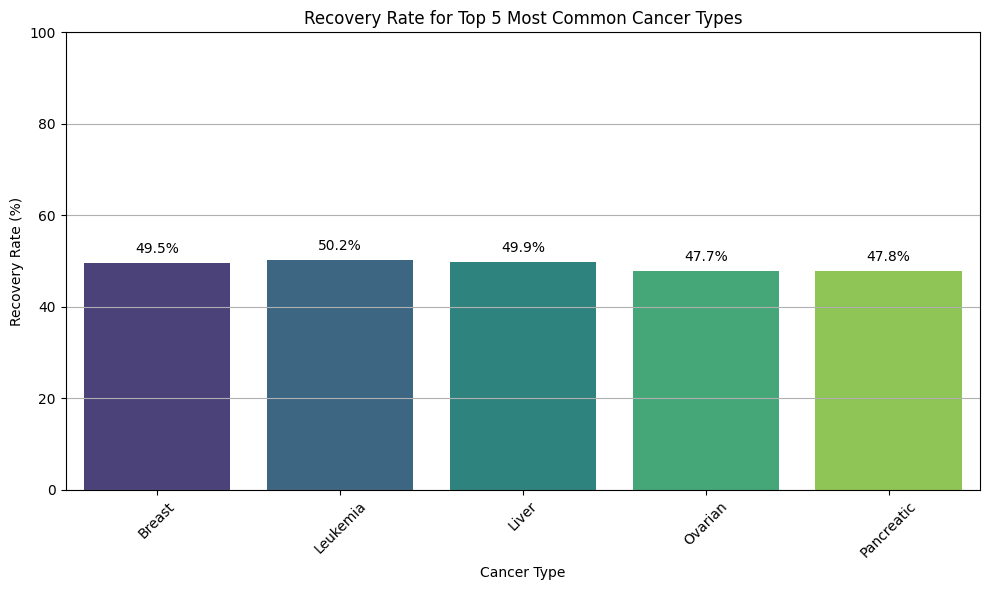

In [295]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

top5_cancers = cp_uae1['Cancer_Type'].value_counts().nlargest(5).index.tolist()

cp_uae1_top5 = cp_uae1[cp_uae1['Cancer_Type'].isin(top5_cancers)]

recovery_counts = cp_uae1_top5.groupby('Cancer_Type')['Outcome'].value_counts().unstack(fill_value=0)
recovery_rates = (recovery_counts['Recovered'] / recovery_counts.sum(axis=1)) * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=recovery_rates.index, y=recovery_rates.values, palette='viridis')
plt.title('Recovery Rate for Top 5 Most Common Cancer Types')
plt.ylabel('Recovery Rate (%)')
plt.xlabel('Cancer Type')
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.xticks(rotation=45)
plt.grid(axis='y')

# Annotate bars with recovery rates (percentage)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

In [97]:
# Data Preprocessing ----------------------------------------------------------
# Convert Diagnosis_Date to datetime and extract year
cp_uae1['Diagnosis_Date'] = pd.to_datetime(cp_uae1['Diagnosis_Date'])
cp_uae1['Year'] = cp_uae1['Diagnosis_Date'].dt.year

# Create Recovery_Status from Outcome
cp_uae1['Recovery_Status'] = cp_uae1['Outcome'].apply(lambda x: 1 if x == 'Recovered' else 0)

# Handle comorbidities
cp_uae1['Comorbidities'] = cp_uae1['Comorbidities'].fillna('None')
comorbidities_dummies = cp_uae1['Comorbidities'].str.get_dummies(sep=', ')
cp_uae1 = pd.concat([cp_uae1, comorbidities_dummies.add_prefix('Comorbidity_')], axis=1)

# Calculate BMI
cp_uae1['Height_m'] = cp_uae1['Height'] / 100
cp_uae1['BMI'] = cp_uae1['Weight'] / (cp_uae1['Height_m'] ** 2)

In [77]:
cp_uae1.columns

Index(['Patient_ID', 'Age', 'Gender', 'Nationality', 'Emirate',
       'Diagnosis_Date', 'Cancer_Type', 'Cancer_Stage', 'Treatment_Type',
       'Treatment_Start_Date', 'Hospital', 'Primary_Physician', 'Outcome',
       'Death_Date', 'Cause_of_Death', 'Smoking_Status', 'Comorbidities',
       'Ethnicity', 'Weight', 'Height', 'Age_Category', 'Year',
       'Recovery_Status', 'Comorbidity_Cardiovascular Disease',
       'Comorbidity_Diabetes', 'Comorbidity_Hypertension', 'Comorbidity_None',
       'Height_m', 'BMI'],
      dtype='object')

In [149]:
cp_uae1.shape

(10000, 29)

In [81]:
cp_uae1.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,...,Height,Age_Category,Year,Recovery_Status,Comorbidity_Cardiovascular Disease,Comorbidity_Diabetes,Comorbidity_Hypertension,Comorbidity_None,Height_m,BMI
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,...,157,older_adult,2020,1,0,0,0,1,1.57,24.747454
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,...,175,young adult,2015,1,0,0,0,1,1.75,26.122449
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,...,175,elderlies,2018,0,0,0,0,1,1.75,16.326531
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,...,155,elderlies,2022,1,0,0,0,1,1.55,18.314256
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,...,160,middle_age,2019,1,0,0,0,1,1.60,39.453125


In [153]:
## Handling Outliers So it doesnt affect the model
from scipy.stats.mstats import winsorize

# Apply Winsorization to Weight and Height columns
cp_uae1['Weight'] = winsorize(cp_uae1['Weight'], limits=[0.05, 0.05])  # Adjust limits as needed
cp_uae1['Height'] = winsorize(cp_uae1['Height'], limits=[0.05, 0.05])

# Filter rows where both Weight and Height columns remain within bounds
df_cleaned = cp_uae1[
    (cp_uae1['Weight'] >= cp_uae1['Weight'].quantile(0.05)) & 
    (cp_uae1['Weight'] <= cp_uae1['Weight'].quantile(0.95)) &
    (cp_uae1['Height'] >= cp_uae1['Height'].quantile(0.05)) & 
    (cp_uae1['Height'] <= cp_uae1['Height'].quantile(0.95))
]

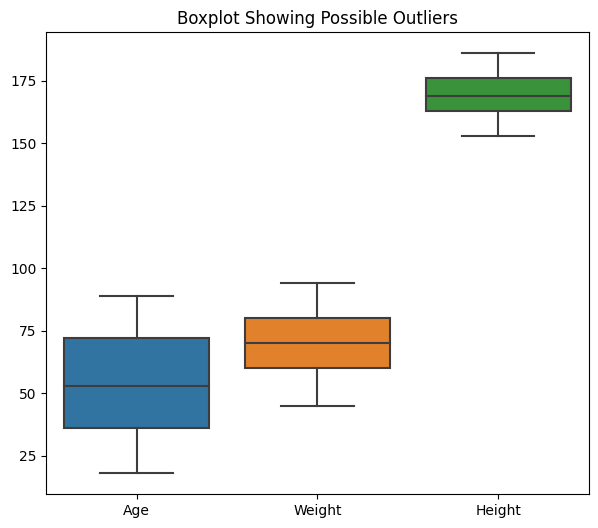

In [155]:
# To confirm if the outliers are completely removed
plt.figure(figsize=(7,6))
sns.boxplot(data=cp_uae1[['Age','Weight','Height']])
plt.title('Boxplot Showing Possible Outliers')
plt.show()

In [159]:
from scipy.stats.mstats import winsorize

# Apply Winsorization to the BMI column
cp_uae1['BMI'] = winsorize(cp_uae1['BMI'], limits=[0.05, 0.05])  # Adjust limits as needed

# Optional: Filter rows to keep only the Winsorized range
df_cleaned = cp_uae1[
    (cp_uae1['BMI'] >= cp_uae1['BMI'].quantile(0.05)) & 
    (cp_uae1['BMI'] <= cp_uae1['BMI'].quantile(0.95))
]

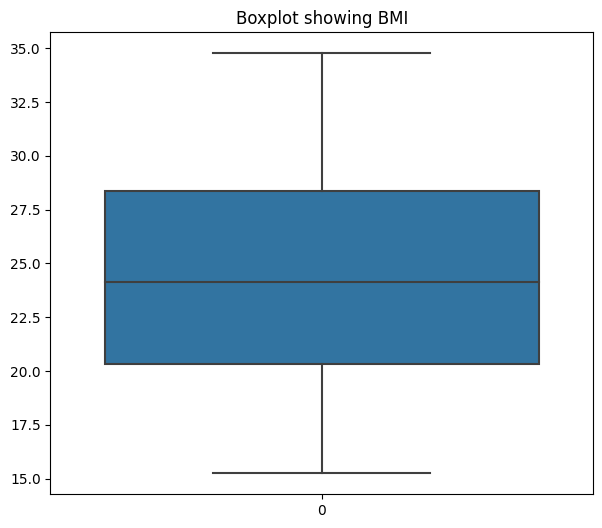

In [161]:
plt.figure(figsize=(7,6))
sns.boxplot(data=cp_uae1['BMI'])
plt.title('Boxplot showing BMI')
plt.show()

# Predictive Modelling

In [163]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define features and target
X = cp_uae1[['Age', 'Gender', 'Nationality', 'Ethnicity', 
            'Smoking_Status', 'Comorbidities', 'Cancer_Type', 
            'Weight', 'Height']]
y = cp_uae1['Cancer_Stage']  # Ensure this is ordinal (I, II, III, IV)

# Preprocessing pipeline
categorical_features = ['Gender', 'Nationality', 'Ethnicity', 
                       'Smoking_Status', 'Comorbidities', 'Cancer_Type']
numerical_features = ['Age', 'Weight', 'Height']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train model
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           I       0.26      0.23      0.24       484
          II       0.33      0.43      0.37       607
         III       0.32      0.36      0.34       608
          IV       0.21      0.07      0.11       301

    accuracy                           0.30      2000
   macro avg       0.28      0.27      0.27      2000
weighted avg       0.29      0.30      0.29      2000



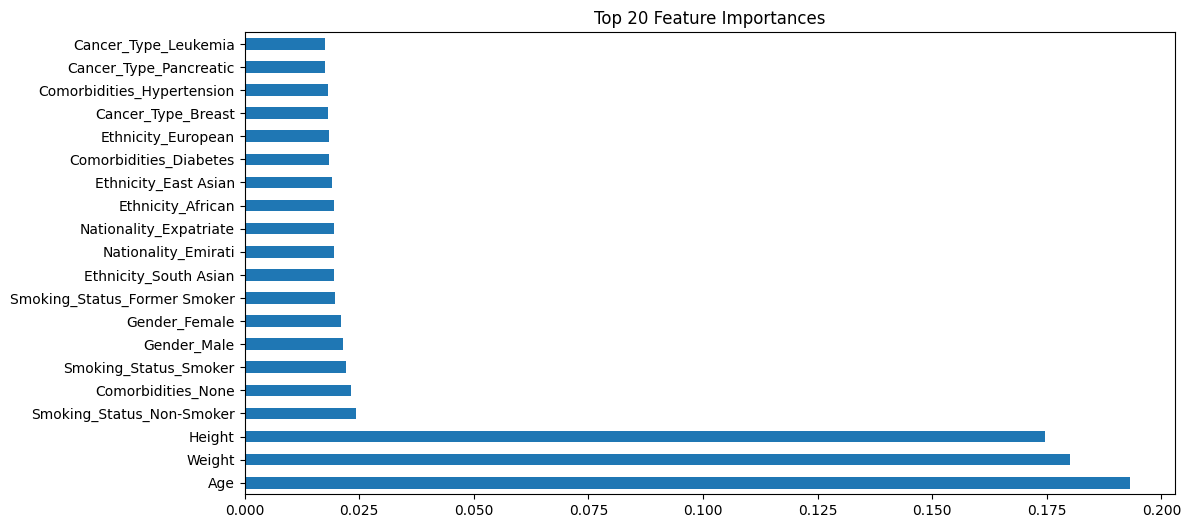

In [167]:
# Get feature names after one-hot encoding
cat_encoder = model.named_steps['preprocessor'].named_transformers_['cat']
cat_features = cat_encoder.get_feature_names_out(categorical_features)
all_features = numerical_features + list(cat_features)

# Extract feature importances
importances = model.named_steps['classifier'].feature_importances_
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)

# Plot top 20 features
plt.figure(figsize=(12,6))
feat_imp[:20].plot(kind='barh')
plt.title('Top 20 Feature Importances')
plt.show()

## Clustering Analysis

In [170]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select features and preprocess
cluster_features = cp_uae1[['Age', 'Gender', 'Nationality', 'Ethnicity',
                           'Smoking_Status', 'Comorbidities', 'Cancer_Type',
                           'Weight', 'Height']]

# Preprocessing (same as before)
cluster_preprocessed = preprocessor.fit_transform(cluster_features)

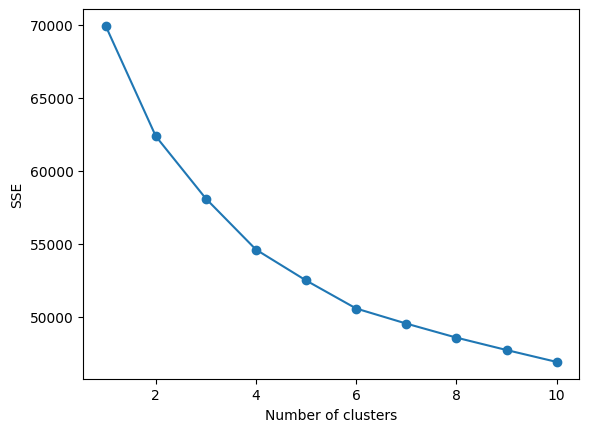

In [172]:
# Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_preprocessed)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

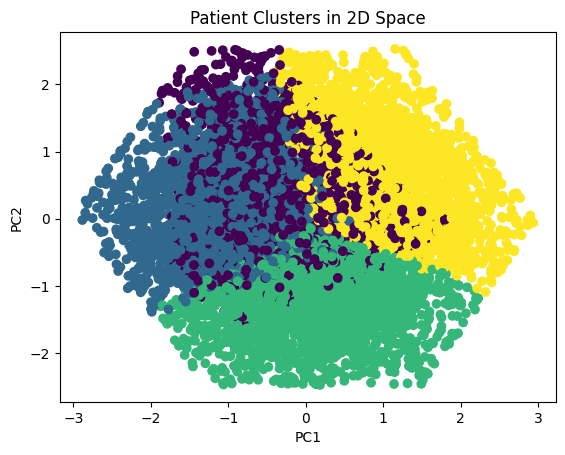

In [174]:
# Final clustering with optimal k (example k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(cluster_preprocessed)

# PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(cluster_preprocessed)

plt.scatter(principal_components[:,0], principal_components[:,1], 
            c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Patient Clusters in 2D Space')
plt.show()

In [176]:
# Add cluster labels to dataframe
cp_uae1['Cluster'] = clusters

# Analyze cluster characteristics
cluster_profile = cp_uae1.groupby('Cluster').agg({
    'Age': 'mean',
    'Cancer_Type': lambda x: x.mode()[0],
    'Smoking_Status': lambda x: x.mode()[0],
    'Comorbidities': lambda x: x.mode()[0]
}).reset_index()

print(cluster_profile)

   Cluster        Age Cancer_Type Smoking_Status Comorbidities
0        0  36.752471    Leukemia     Non-Smoker          None
1        1  68.450163     Ovarian     Non-Smoker          None
2        2  71.678571  Pancreatic     Non-Smoker          None
3        3  37.251165     Ovarian     Non-Smoker          None


In [13]:
import sys
print(sys.version)

3.7.1 (default, Oct 28 2018, 08:39:03) [MSC v.1912 64 bit (AMD64)]
